<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/5.%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. 인공 신경망(Aritificial Neural Network)

출처 : (https://github.com/Namsik-Yoon/pytorch_basic/blob/master/5.%20%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D(Aritificial%20Neural%20Network).ipynb)

##5.1 머신 러닝 용어 이해하기

###5.1.1 머신 러닝 모델의 평가

![대체 텍스트](https://wikidocs.net/images/page/24987/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

실제 모델을 평가하기 위해서 데이터를 훈련용, 검증용, 테스트용 이렇게 세 가지로 분리한다.

훈련용, 테스트용으로만 분리해서 사용하지 왜 굳이 검증용 데이터를 만들어 놓는 것일까?

검증용 데이터는 모델의 성능을 평가하기 위한 용도가 아니라, 모델의 성능을 조정하기 위한 용도이다. 더 정확히는 과적합이 되고 있는지 판단하거나 하이퍼파라미터(초매개변수로 값에 따라서 모델의 성능에 영향을 주는 매개변수들을 말한다. 가중치와 편향과 같은 학습을 통해 바뀌어져가는 변수는 매개변수라고 부른다. 하이퍼파라미터는 사용자가 직접 정해줄 수 있는 변수로 경사 하강법에서 학습률, 딥 러닝에서는 은닉층의 수, 뉴런의 수, 드롭아웃 비율 등이 해당된다.)의 조정을 위한 용도이다.

훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 정확도를 검증하며 하이퍼파라미터를 튜닝(tuning)한다. 이 과정에서 모델의 매개변수는 검증용 데이터를 학습하기 때문에 모델에 대한 평가는 모델이 아직까지 보지 못한 테스트 데이터로 하는 것이 가장 바람직하다.

비유하자면 훈련 데이터는 문제지, 검증 데이터는 모의고사, 테스트 데이터는 수능 시험이라 볼 수 있다.

만약, 검증 데이터와 테스트 데이터를 나눌 만큼 데이터가 충분하지 않다면 k-폴드 교차 검증이라는 또 다른 방법을 사용하기도 한다.

###5.1.2 분류(Classification)와 회귀(Regression)

머신 러닝의 많은 문제는 분류 또는 회귀 문제에 속한다.

1) 이진 분류 문제(Binary Classification)

이진 분류는 주어진 입력에 대해서 둘 중 하나의 답을 정하는 문제이다. 시험 성적에 대해서 합격, 불합격인지 판단하고 메일로부터 정상 메일, 스팸 메일인지를 판단하는 문제 등이 이에 속한다.

2) 다중 클래스 분류(Multi-class Classification)

다중 클래스 분류는 주어진 입력에 대해서 세 개 이상의 정해진 선택지 중에서 답을 정하는 문제이다. 서점 아르바이트를 하는데 과학, 영어, IT, 학습지, 만화라는 레이블이 각각 붙여져 있는 5개의 책장이 있다고 하자. 새 책이 입고되면 적절한 책장에 책을 넣어야 한다. 5개의 책장을 주로 카테고리 또는 범주 또는 클래스라고 하며, 주어진 입력으로부터 정해진 클래스 중 하나로 판단하는 것을 다중 클래스 분류 문제라고 한다.

3) 회귀 문제(Regression)

회귀 문제는 분류 문제처럼 0 또는 1이나 과학 책장, IT 책장 등과 같이 분리된(비연속적인) 답이 결과가 아니라 연속된 값을 결과로 가진다. 예를 들어 시험 성적을 예측하는데 5시간 공부하였을 때 80점, 5시간 1분 공부하였을 떄는 80.5점, 7시간 공부하였을 떄는 90점 등이 나오는 것과 같은 문제가 있다. 그 외에도 시계열 데이터를 이용한 주가 예측, 생산량 예측, 지수 예측 등이 이에 속한다.

###5.1.3 지도 학습(Supervised Learning)과 비지도 학습(Unsupervised Learning)

1) 지도 학습

지도 학습이란 레이블(Label)이라는 정답과 함께 학습하는 것을 말한다. 레이블이라는 말 외에도 $y$, 실제값 등으로 부르기도 한다. 이때 기계는 예측값과 실제값의 차이인 오차를 줄이는 방식으로 학습을 하게 되는데 예측값은 $\hat{y}$과 같이 표현하기도 한다.

2) 비지도 학습

비지도 학습은 기본적으로 목적 데이터(또는 레이블)이 없는 학습 방법이다. 대표적으로 군집(clustering)이나 차원 축소와 같은 학습 방법들을 비지도 학습이라 한다.

3) 강화 학습

강화 학습은 어떤 환경 내에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동들 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법이다.

###5.1.4 샘플(Sample)과 특성(Feature)

많은 머신 러닝 문제가 1개 이상의 독립 변수 $x$를 가지고 종속 변수 $y$를 예측하는 문제다. 인공신경망 모델은 독립 변수 $x$, 종속 변수 $y$, 가중치, 편향 등을 행렬 연산을 통해 계산하는 경우가 많다. 

아래 그림은 독립 변수 $x$의 행렬을 $X$라고 하였을 때, 독립 변수 $x$의 개수가 n개이고 데이터의 개수가 m개인 행렬 $X$를 그림으로 표현한 것이다.

![대체 텍스트](https://wikidocs.net/images/page/35821/n_x_m.PNG)


머신 러닝에서는 하나의 데이터, 하나의 행을 샘플(Sample)이라고 부른다.

종속 변수 $y$를 예측하기 위한 각각의 독립 변수 $x$를 특성(Feature)이라고 부른다.

###5.1.5 혼동 행렬(Confusion Matrix)

머신 러닝에서는 맞춘 문제 수를 전체 문제 수로 나눈 값을 정확도(Accuracy)라고 한다.

하지만 정확도는 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 알려주지는 않는다.

이를 위해서 사용하는 것이 혼동 행렬(Confusion Matrix)이다.

예를 들어 양성(Positive)과 음성(Negative)을 구분하는 이진 분류가 있다고 하였을 때 혼동 행렬은 다음과 같다.

|-|참(예측)|거짓(예측)|
|---|---|---|
|참(실제)|True Positive(TP)|False Negative(FN)|
|거짓(실제)|False Positive(FP)|True Negative(TN)|

각 열은 예측값, 각 행은 실제값을 나타낸다.

예를 들어 TP는 양성(Positive)이라고 대답하였고 실제로 양성이라서 정답을 맞춘 경우이다. TN는 음성(Negative)이라고 대답하였고 실제로 음성이여서 정답을 맞춘 경우이다.

FP는 양성(Positive)이라고 대답하였는데 실제로 음성이라서 정답을 틀린 경우이다.
FN는 음성(Negative)이라고 대답하였는데 실제로 양성이라서 정답을 틀린 경우이다.

이 개념을 사용하여 정밀도(Precision)와 재현률(Recall)을 정의할 수 있다.

정밀도(Precision) : 양성(Positive)이라고 대답한 전체 케이스에 대한 TP의 비율이다.

정밀도 = $\frac{TP}{TP + FP}$

재현률(Recall) : 실제값이 양성(Positive)인 데이터의 전체 케이스에 대한 TP의 비율이다. 즉, 양성인 데이터 중에서 얼마나 양성인지를 예측(재현)했는지를 나타낸다.

재현률 = $\frac{TP}{TP + FN}$

정확도(Accuracy) : 전체 중에서 올바르게 예측한 것이 몇개인지를 나타낸다.

정확도 = $\frac{TP + TN}{TP + TN + FP + FN}$

###5.1.6 과적합(Overfitting)과 과소 적합(Underfitting)

과적합(Overfitting) : 훈련 데이터를 과하게 학습한 경우를 말한다. 훈련 데이터는 잘 맞추는데 테스트 데이터를 못 맞추는 경우이다.

과적합 상황에서는 훈련 데이터에 대해서는 오차가 낮지만, 테스트 데이터에 대해서는 오차가 높아진다.

![대체 텍스트](https://wikidocs.net/images/page/32012/%EC%8A%A4%ED%8C%B8_%EB%A9%94%EC%9D%BC_%EC%98%A4%EC%B0%A8.png)

과적합 방지를 위해 테스트 데이터의 성능이 낮아지기 전에 훈련을 멈추는 것이 바람직한데, 테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태를 반대로 과소 적합(Underfitting)이라고 한다. 과소 적합은 훈련 데이터도 못 맞추고 테스트 데이터도 못 맞춘다.

딥 러닝을 할 때는 과적합을 막을 수 있는 드롭아웃(Dropout), 조기 종료(Early Stopping)과 같은 몇 가지 방법이 존재하는데 이는 인공 신경망 챕터에서 소개한다.

##5.2 퍼셉트론(Perceptron)

###5.2.1 퍼셉트론(Perceptron)

퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘이다.

퍼셉트론은 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사하다.

뉴런은 가지돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달한다.

![대체 텍스트](https://wikidocs.net/images/page/24958/%EB%89%B4%EB%9F%B0.PNG)


이제 다수의 입력을 받는 퍼셉트론의 그림을 보면, 신경 세포 뉴런의 입력 신호와 출력 신호가 퍼셉트론에서 각각 입력값과 출력값에 해당된다.

![대체 텍스트](https://wikidocs.net/images/page/24958/perceptrin1_final.PNG)

$x$는 입력값을 의미하며, $W$는 가중치(Weiight), $y$는 출력값이다. 

실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신한다. 

각각의 인공 뉴런에서 보내진 입력값 $x$는 각각의 가중치 $W$와 함께 종착지인 인공 뉴런에 전달되고 있다. 

각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미한다.

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 임계치를 넘지 않으면 0을 출력한다.

이러한 함수를 계단 함수(Step function)라고 한다. 아래 그래프는 계단 함수의 하나의 예를 보여준다.

![대체 텍스트](https://wikidocs.net/images/page/24987/step_function.PNG)

이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타(Θ)로 표현한다. 이를 식으로 표현하면 다음과 같다.

if $\sum_i^{n} W_{i}x_{i}$ ≥ $\theta$ → $y=1$

if $\sum_i^{n} W_{i}x_{i}$ < $\theta$ → $y=0$

단, 위의 식에서 임계치를 좌변으로 넘기고 편향 $b$(bias)로 표현할 수도 있다. 편향 $b$ 또한 퍼셉트론의 입력으로 사용된다. 보통 그림으로 표현할 때는 입력값이 1로 고정되고 편향 $b$가 곱해지는 변수로 표현된다.

![대체 텍스트](https://wikidocs.net/images/page/24958/perceptron2_final.PNG)

if $\sum_i^{n} W_{i}x_{i} + b$ ≥ $0$ → $y=1$

if $\sum_i^{n} W_{i}x_{i} + b$ < $0$ → $y=0$


많은 인공 신경망 자료에서 편의상 편향$b$가 그림이나 수식에서 생략되서 표현되기도 하지만 실제로는 편향$b$ 또한 딥 러닝이 최적의 값을 찾아야 할 변수 중 하나이다.

이렇게 뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 한다. 초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만, 그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했다. 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나이다.

여기서 활성화 함수를 시그모이드 함수로 변경하면 퍼셉트론은 곧 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있다. 다시 말하면 로지스틱 회귀 모델이 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있다. 로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이이다.

*   인공 뉴런 : 활성화 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$
*   위의 퍼셉트론(인공 뉴런 종류 중 하나) : 계단 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$ 

###5.2.2 단층 퍼셉트론(Single-Layer Perceptron)

위에서 배운 퍼셉트론을 단층 퍼셉트론이라고 한다. 퍼셉트론은 단층과 다층으로 나누어지는데, 단층 퍼셉트론은 값을 보내는 단계와 값을 받아서 출력하는 두 단계로만 이루어진다.

이때 이 각 단계를 보통 층(layer)라고 부르며, 이 두개의 층을 입력층(input layer)과 출력층(output layer)이라고 한다.

![대체 텍스트](https://wikidocs.net/images/page/24958/perceptron3_final.PNG)

단층 퍼셉트론을 이용하면 AND, NAND, OR 게이트를 쉽게 구현할 수 있다. 게이트 연산에 쓰이는 것은 두 개의 입력값과 하나의 출력값이다. 예를 들어 AND 게이트의 경우에는 두 개의 입력 값이 모두 1인 경우에만 출력값이 1이 나오는 구조를 갖고 있다.

![대체 텍스트](https://wikidocs.net/images/page/24958/andgate.PNG)

단층 퍼셉트론의 식을 통해 AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있을까? 각각 w1, w2, b라고 한다면 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 이 외에도 다양한 가중치와 편향의 조합이 나올 수 있습니다. 이해를 돕기 위해서 AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해보자.

In [0]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

그렇다면 두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1이 나오는 NAND 게이트는 어떨까?

![대체 텍스트](https://wikidocs.net/images/page/24958/nandgate.PNG)

앞서 언급했던 AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족한다. 파이썬 코드를 통해서 이를 확인해보자.

In [0]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

NAND 게이트를 구현한 파이썬 코드에 입력값을 넣자, 두 개의 입력값이 1인 경우에만 0이 나오는 것을 확인할 수 있다. 퍼셉트론으로 NAND 게이트를 구현한 것아다. [-0.5, -0.5, -0.7] 외에도 퍼셉트론이 NAND 게이트의 동작을 하도록 하는 다양한 가중치와 편향의 값들이 있을 것이다.

두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1인 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있다.

![대체 텍스트](https://wikidocs.net/images/page/24958/orgate.PNG)

예를 들어 각각 가중치와 편향에 대해서 [0.6, 0.6, -0.5]를 선택하면 OR 게이트를 충족한다.

In [0]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

물론, 이 외에도 이를 충족하는 다양한 가중치와 편향의 값이 있다.

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트 또한 구현할 수 있다. 하지만 단층 퍼셉트론으로 구현이 불가능한 게이트가 있는데 바로 XOR 게이트다. XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트다. 위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능하다. 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문이다.

예를 들어 AND 게이트에 대한 단층 퍼셉트론을 시각화해보면 다음과 같다.

![대체 텍스트](https://wikidocs.net/images/page/24958/andgraphgate.PNG)

그림에서는 출력값 0을 하얀색 원, 1을 검은색 원으로 표현했다. AND 게이트를 충족하려면 하얀색 원과 검은색 원을 직선으로 나누게 된다. 마찬가지로 NAND 게이트나 OR 게이트에 대해서도 시각화를 했을 때 직선으로 나누는 것이 가능하다.

![대체 텍스트](https://wikidocs.net/images/page/24958/oragateandnandgate.PNG)

그렇다면 XOR 게이트는 어떨까? XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트다. XOR 게이트를 시각화해보면 다음과 같다.


![대체 텍스트](https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG)

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능하다. 즉, 단층 퍼셉트론으로는 XOR 게이트를 구현하는 것이 불가능하다. 이를 단층 퍼셉트론은 선형 영역에 대해서만 분리가 가능하다고 말한다. 사실 XOR 게이트는 직선이 아닌 곡선. 비선형 영역으로 분리하면 구현이 가능하다.

![대체 텍스트](https://wikidocs.net/images/page/24958/xorgate_nonlinearity.PNG)

위의 그림은 곡선을 사용한다면 하얀색 원과 검은색 원을 나눌 수 있음을 보여준다. 이제 XOR 게이트를 만들 수 있는 다층 퍼셉트론에 대해서 알아보도록 하겠다.

###5.2.3 다층 퍼셉트론(MultiLayer Perceptron, MLP)

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있다. 퍼셉트론 관점에서 말하면, 층을 더 쌓으면 만들 수 있다. 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점이다. 이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 한다. 즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다르다. 다층 퍼셉트론은 줄여서 MLP라고도 부른다.

![대체 텍스트](https://wikidocs.net/images/page/24958/perceptron_4image.jpg)

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예이다. (실제 구현은 숙제다.) XOR 예제에서는 은닉층 1개만으로 문제를 해결할 수 있었지만, 다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말한다. 즉, XOR 문제보다 더욱 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있습다. 은닉층의 개수는 2개일 수도 있고, 수십 개일수도 있고 사용자가 설정하기 나름이다. 아래는 더 어려운 문제를 풀기 위해서 은닉층이 하나 더 추가되고(이 경우에는 은닉층이 2개), 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여준다.


![대체 텍스트](https://wikidocs.net/images/page/24958/%EC%9E%85%EC%9D%80%EC%B8%B5.PNG)

위와 같이 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 한다. 심층 신경망은 다층 퍼셉트론만 이야기 하는 것이 아니라, 여러 변형된 다양한 신경망들도 은닉층이 2개 이상이 되면 심층 신경망이라고 한다.

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 가야할 정답을 참고로 퍼셉트론이 정답을 출력할 때까지 가중치를 바꿔보면서 맞는 가중치를 찾았다. 즉, 가중치를 수동으로 찾았다. 하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 학습(training) 단계에 해당된다. 앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용한다. 그리고 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, 딥 러닝(Deep Learning)이라고 한다.

##5.3 XOR 문제 - 단층 퍼셉트론 구현하기

###5.3.1 파이토치로 단층 퍼셉트론 구현하기

In [0]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [0]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [0]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [0]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [11]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200번 에포크에서의 비용과 10,000번 에포크에서의 비용이 같다. 이는 단층 퍼셉트론이 XOR 문제를 풀 수 없기 때문이다.

###5.3.2 학습된 단층 퍼셉트론의 예측값 확인하기

In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


실제값은 0,1,1,0인데 예측값은 0,0,0,0으로 문제를 풀지 못하는 모습을 보여준다.

##5.4 XOR 문제 - 다층 퍼셉트론 구현하기

###5.4.1 파이토치로 다층 퍼셉트론 구현하기

In [0]:
import torch
import torch.nn as nn

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [0]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [0]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

위 인공 신경망을 그림으로 표현하면 아래와 같다.

![대체 텍스트](https://wikidocs.net/images/page/61010/ann.PNG)

In [0]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [18]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931514143943787
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931171417236328
2100 0.6931144595146179
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.693105161190033
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763721466064
3100 0.6930692195892334
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.693041205406189
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929102540016174
4100 0.6928648948669434
4200 0.

###5.4.2 학습된 다층 퍼셉트론의 예측값 확인하기

In [19]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168919e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8533067e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


실제값과 예측값이 같은 모습을 보여준다.

##5.5 역전파(BackPropagation)

###5.5.1 인공 신경망의 이해(Neural Network Overview)

우선 예제를 위해 사용될 인공 신경망을 소개한다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가진다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용한다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용한다.

![대체 텍스트](https://wikidocs.net/images/page/37406/nn1_final.PNG)

위의 그림은 여기서 사용할 인공 신경망의 모습을 보여준다. 은닉층과 출력층의 모든 뉴런에서 변수 $z$가 존재하는데 여기서 변수 $z$는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미한다. 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태다. 즉, 활성화 함수의 입력을 의미한다. $z$ 우측의 |를 지나서 존재하는 변수 $h$ 또는 $o$는 $z$가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미한다. 이번 역전파 예제에서는 인공 신경망에 존재하는 모든 가중치 W에 대해서 역전파를 통해 업데이트하는 것을 목표로 한다. 해당 인공 신경망은 편향 b는 고려하지 않았다.

###5.5.2 순전파(Forward Propagation)

![대체 텍스트](https://wikidocs.net/images/page/37406/nn2_final_final.PNG)

주어진 값이 위의 그림과 같을 때 순전파를 진행해보자. 위의 그림에서 소수점 앞의 0은 생략했다. 예를 들어 .25는 0.25를 의미한다. 파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미한다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기한다.

각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 된다. $z_1$과 $z_2$는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당된다.

$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08$

$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11$

$z_1$과 $z_2$는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값이다. 식에서는 각각 $h_1$과 $h_2$에 해당되며, 아래의 결과와 같다.

$h_{1}=sigmoid(z_{1}) = 0.51998934$

$h_{2}=sigmoid(z_{2}) = 0.52747230$

$h_1$과 $h_2$ 이 두 값은 다시 출력층의 뉴런으로 향하게 되는데 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 됩니다. 식에서는 각각 $z_3$과 $z_4$에 해당된다.

$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$

$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$

$z_3$과 $z_4$이 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값이다. 실제값을 예측하기 위한 값으로서 예측값이라고도 부른다.

$o_{1}=sigmoid(z_{3})=0.60944600$

$o_{2}=sigmoid(z_{4})=0.66384491$

이제 해야할 일은 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것이다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용한다. 식에서는 실제값을 target이라고 표현하였으며, 순전파를 통해 나온 예측값을 output으로 표현했다. 그리고 각 오차를 모두 더하면 전체 오차 $E_{total}$가 된다.

$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$

$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$

$E_{total}=E_{o1}+E_{o2}=0.02397190$

###5.5.3 역전파 1단계(BackPropagation Step 1)

순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트한다. 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 해보자.

![대체 텍스트](https://wikidocs.net/images/page/37406/nn3_final.PNG)

역전파 1단계에서 업데이트 해야 할 가중치는 $W_5,W_6,W_7,W_{8}$ 총 4개다. 원리 자체는 동일하므로 우선 $W_{5}$에 대해서 먼저 업데이트를 진행해보겠다. 경사 하강법을 수행하려면 가중치 $W_{5}$를 업데이트 하기 위해서 $ \frac{\partial E_{total}}{\partial W_{5}}$를 계산해야 한다.

$\frac{\partial E_{total}}{\partial W_{5}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있다.

$\frac{\partial E_{total}}{\partial W_{5}} = \frac{\partial E_{total}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{\partial z_{3}}{\partial W_{5}}$

위의 식에서 우변의 세 개의 각 항에 대해서 순서대로 계산해보자. 우선 첫번째 항에 대해서 계산해보겠다. 미분을 진행하기 전에 $E_{total}$의 값을 상기해보자. $E_{total}$은 앞서 순전파를 진행하고 계산했던 전체 오차값이다. 식은 다음과 같다.

$E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$

이에 $\frac{\partial E_{total}}{\partial o_{1}}$는 다음과 같다.

$\frac{\partial E_{total}}{\partial o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$

$\frac{\partial E_{total}}{\partial o_{1}}=-(target_{o1}-output_{o1})=-(0.4-0.60944600)=0.20944600$

이제 두번째 항을 주목해보자. $o_1$이라는 값은 시그모이드 함수의 출력값이다. 그런데 시그모이드 함수의 미분은 $f(x)$x$(1-f(x))$이다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해두자. 이에 따라서 두번째 항의 미분 결과는 다음과 같다.
(시그모이드 함수 미분 참고 링크 : https://en.wikipedia.org/wiki/Logistic_function#Derivative)

$\frac{\partial o_{1}}{\partial z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$

마지막으로 세번째 항은 $h_1$의 값과 동일하다.

$\frac{\partial z_{3}}{\partial W_{5}}=h_{1}=0.51998934$

우변의 모든 항을 계산하였다. 이제 이 값을 모두 곱해주면 된다.

$\frac{\partial E_{total}}{\partial W_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔다! 하이퍼파라미터에 해당되는 학습률(learning rate) $\alpha $는 0.5라고 가정한다.

$W_{5}^{+}=W_{5}-\alpha \frac{\partial E_{total}}{\partial W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$

이와 같은 원리로 $W_{6}^{+},\ W_{7}^{+},\ W_{8}^{+}$을 계산할 수 있다.

$\frac{\partial E_{total}}{\partial W_{6}} = \frac{\partial E_{total}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{\partial z_{3}}{\partial W_{6}}$ → $W_{6}^{+}=0.38685205$

$\frac{\partial E_{total}}{\partial W_{7}} = \frac{\partial E_{total}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{\partial z_{4}}{\partial W_{7}}$ → $W_{7}^{+}=0.69629578$

$\frac{\partial E_{total}}{\partial W_{8}} = \frac{\partial E_{total}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{\partial z_{4}}{\partial W_{8}}$ → $W_{8}^{+}=0.59624247$





###5.5.4 역전파 2단계(BackPropagation Step 2)

![대체 텍스트](https://wikidocs.net/images/page/37406/nn4.PNG)

1단계를 완료하였다면 이제 입력층 방향으로 이동하며 다시 계산을 이어간다. 위의 그림에서 빨간색 화살표는 순전파의 정반대 방향인 역전파의 방향을 보여준다. 현재 인공 신경망은 은닉층이 1개밖에 없으므로 이번 단계가 마지막 단계다. 하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한 단계씩 계속해서 계산해가야 한다.

이번 단계에서 계산할 가중치는 $W_{1}, W_{2}, W_{3}, W_{4}$ 다. 원리 자체는 동일하므로 우선 $W_1$에 대해서 먼저 업데이트를 진행해보자. 경사 하강법을 수행하려면 가중치$W_1$를 업데이트 하기 위해서 $\frac{\partial E_{total}}{\partial W_{1}}$를 계산해야 한다.

$\frac{\partial E_{total}}{\partial W_{1}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있다.

$\frac{\partial E_{total}}{\partial W_{1}} = \frac{\partial E_{total}}{\partial h_{1}} \text{×} \frac{\partial h_{1}}{\partial z_{1}} \text{×} \frac{\partial z_{1}}{\partial W_{1}}$

위의 식에서 우변의 첫번째항인 $\frac{\partial E_{total}}{\partial h_{1}}$는 다음과 같이 다시 식을 풀어서 쓸 수 있다.

$\frac{\partial E_{total}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial h_{1}} + \frac{\partial E_{o2}}{\partial h_{1}}$


위의 식의 우변의 두 항을 각각 구해보자. 우선 첫번째 항 $\frac{\partial E_{o1}}{\partial h_{1}}$에 대해서 항을 분해 및 계산해보겠다.

$\frac{\partial E_{o1}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial z_{3}} \text{×} \frac{{\partial z_{3}}}{\partial h_{1}} = \frac{\partial E_{o1}}{\partial o_{1}} \text{×} \frac{\partial o_{1}}{\partial z_{3}} \text{×} \frac{{\partial z_{3}}}{\partial h_{1}}$

$= -(target_{o1}-output_{o1}) \text{×} o_{1}\text{×}(1-o_{1}) \text{×} W_{5}$

$= 0.20944600 \text{×} 0.23802157 \text{×} 0.45 = 0.02243370$

이와 같은 원리로 $\frac{\partial E_{o2}}{\partial h_{1}}$ 또한 구한다.

$\frac{\partial E_{o2}}{\partial h_{1}} = \frac{\partial E_{o2}}{\partial z_{4}} \text{×} \frac{{\partial z_{4}}}{\partial h_{1}} = \frac{\partial E_{o2}}{\partial o_{2}} \text{×} \frac{\partial o_{2}}{\partial z_{4}} \text{×} \frac{{\partial z_{4}}}{\partial h_{1}} = 0.00997311$

$\frac{\partial E_{total}}{\partial h_{1}} = 0.02243370 + 0.00997311 = 0.03240681$

이제 $\frac{\partial E_{total}}{\partial W_{1}}$를 구하기 위해서 필요한 첫번째 항을 구했다. 나머지 두 항에 대해서 구해보도록 하겠다.

$\frac{\partial h_{1}}{\partial z_{1}} = h_{1}\text{×}(1-h_{1}) = 0.51998934(1-0.51998934)=0.24960043$

$\frac{\partial z_{1}}{\partial W_{1}} = x_{1} = 0.1$

즉, $\frac{\partial E_{total}}{\partial W_{1}}$는 다음과 같다.

$\frac{\partial E_{total}}{\partial W_{1}} = 0.03240681 \text{×} 0.24960043 \text{×} 0.1 = 0.00080888$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 수 있다.

$W_{1}^{+}=W_{1}-\alpha \frac{\partial E_{total}}{\partial W_{1}}=0.1- 0.5 \text{×} 0.00080888=0.29959556$

이와 같은 원리로 $W_{2}^{+},\ W_{3}^{+},\ W_{4}^{+}$을 계산할 수 있다.

$\frac{\partial E_{total}}{\partial W_{2}} = \frac{\partial E_{total}}{\partial h_{1}} \text{×} \frac{\partial h_{1}}{\partial z_{1}} \text{×} \frac{\partial z_{1}}{\partial W_{2}}$ → $W_{2}^{+}=0.24919112$

$\frac{\partial E_{total}}{\partial W_{3}} = \frac{\partial E_{total}}{\partial h_{2}} \text{×} \frac{\partial h_{2}}{\partial z_{2}} \text{×} \frac{\partial z_{2}}{\partial W_{3}}$ → $W_{3}^{+}=0.39964496$

$\frac{\partial E_{total}}{\partial W_{4}} = \frac{\partial E_{total}}{\partial h_{2}} \text{×} \frac{\partial h_{2}}{\partial z_{2}} \text{×} \frac{\partial z_{2}}{\partial W_{4}}$ → $W_{4}^{+}=0.34928991$


###5.5.5 결과 확인

![대체 텍스트](https://wikidocs.net/images/page/37406/nn1_final.PNG)

업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인해보겠다.

$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.29959556 \text{×} 0.1 + 0.24919112 \text{×} 0.2= 0.07979778$

$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.39964496 \text{×} 0.1 + 0.34928991 \text{×} 0.2= 0.10982248$

$h_{1}=sigmoid(z_{1}) = 0.51993887$

$h_{2}=sigmoid(z_{2}) = 0.52742806$

$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.43703857 \text{×} h_{1} + 0.38685205 \text{×} h_{2} = 0.43126996$

$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.69629578 \text{×} h_{1} + 0.59624247 \text{×} h_{2} = 0.67650625$

$o_{1}=sigmoid(z_{3})=0.60617688$

$o_{2}=sigmoid(z_{4})=0.66295848$

$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02125445$

$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00198189$

$E_{total}=E_{o1}+E_{o2}=0.02323634$

기존의 전체 오차 $E_{total}$가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말한다.

##5.6 비선형 활성화 함수(Activation function)

###5.6.1 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점이다.

선형 함수는 출력이 입력의 상수배만큼 변하는 함수다.

반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수다.

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속 추가해야 한다.

활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없다.

활성화 함수는 $f(x)=Wx$라고 가정하고 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x)=f(f(f(x)))$가 된다. 

이를 식으로 표현하면 $W$x$W$x$W$x$x$다. 그런데 이는 잘 생각해보면 W의 세 제곱값을 $k$라고 정의해버리면 $y(x)=kx$와 같이 다시 표현이 가능하다. 

즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.

선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 것은 아니다.

학습 가능한 가중치가 새로 생긴다는 점은 의미가 있고 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현한다.

활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)이라고 한다.

###5.6.2 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정해보겠다.

![대체 텍스트](https://wikidocs.net/images/page/60683/simple-neural-network.png)

위 인공 신경망의 학습 과정은 다음과 같다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 역전파(back propagation)를 수행한다.

그리고 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생한다.

In [0]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

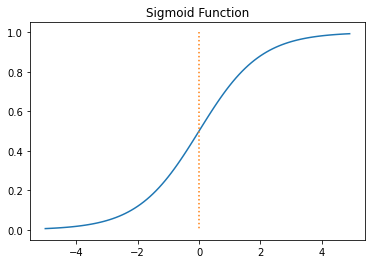

In [21]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여준다. 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠다.

![대체 텍스트](https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG)

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 된다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 된다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 한다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 된다. 다시 말해 매개변수 $W$가 업데이트 되지 않아 학습이 되지를 않는다.

![대체 텍스트](https://wikidocs.net/images/page/60683/%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EC%86%8C%EC%8B%A4.png)

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여준다. 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양된다.

###5.6.3 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

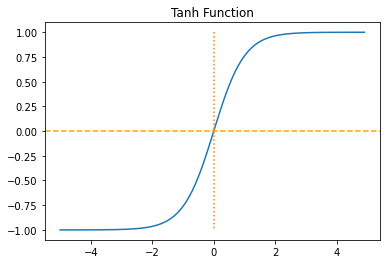

In [22]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생한다. 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 크다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이다. 그래서 은닉층에서 시그모이드 함수보다는 많이 사용된다.

###5.6.4 렐루 함수(ReLU)

인공 신경망에서 가장 최고의 인기를 얻고 있는 함수다. 수식은 $f(x)=max(0,x)$로 아주 간단하다.



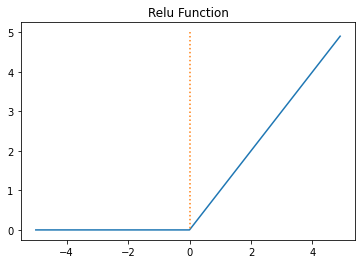

In [23]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다. 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 된다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵다. 이 문제를 죽은 렐루(dying ReLU)라고 한다.

###5.6.5 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개한다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있다.

수식은 $f(x)=max(ax,x)$로 아주 간단하다. a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가진다. 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있다.

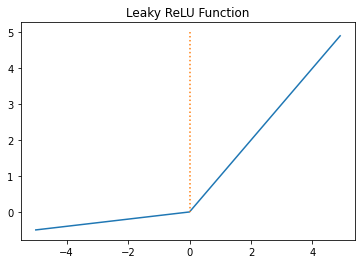

In [24]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않는다.

###5.6.6 소프트맥스 함수(Softmax function)

은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아니다. 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용한다.

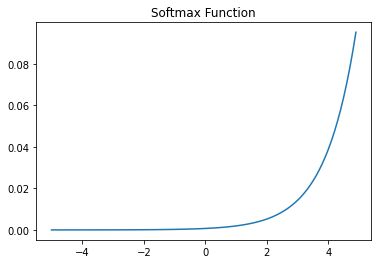

In [25]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용된다.

###5.6.7 출력층의 활성화 함수와 오차 함수의 관계

은닉층의 활성화 함수로는 ReLU 또는 Leaky ReLU와 같은 ReLU의 변형을 사용하라고 정리해봤다. 그렇다면 출력층은 어떨까? 각 문제에 따른 출력층의 활성화 함수와 비용 함수의 관계를 정리해보면 다음과 같다. 이 외에도 다중 레이블 분류도 있지만 여기서는 다루지 않겠다.

|문제|활성화 함수|비용 함수|
|---|---|---|
|이진 분류|시그모이드|nn.BCELoss()|
|다중 클래스 분류|소프트맥스|nn.CrossEntropyLoss()|
|회귀|없음|nn.MSELoss()|

주의할 점은 nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있다.


참고 자료 : https://excelsior-cjh.tistory.com/177



*   시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점입니다(Not zero-centered). 따라서, 평균이 0이 아니라 0.5이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높습니다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있습니다.


*   하이퍼볼릭탄젠트 함수는 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않습니다. 하지만, 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있습니다.


*    스탠포드 대학교의 딥 러닝 강의 cs231n에서는 ReLU를 먼저 시도해보고, 그다음으로 LeakyReLU나 ELU 같은 ReLU의 변형들을 시도해보며, sigmoid는 사용하지 말라고 권장합니다.


##5.7 다층 퍼셉트론으로 손글씨 분류하기

###5.7.1 숫자 필기 데이터 소개

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지다. 그리고 해당 이미지가 1,797개가 있다.

load_digits()를 통해 이미지 데이터를 로드할 수 있다. 로드한 전체 데이터를 digits에 저장한다.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [27]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


첫번째 샘플이 8 × 8 행렬로 출력된 것을 볼 수 있다. 0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보안다. 실제로 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인해보자.

In [28]:
print(digits.target[0])

0


In [29]:
print(f'전체 샘플의 수 : {len(digits.images)}')

전체 샘플의 수 : 1797


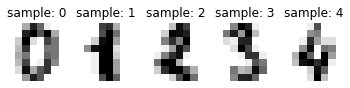

In [30]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [31]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


이제 훈련 데이터와 레이블을 각각 X, Y에 저장해보자. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있다. 더 나은 방법은 digts.data를 사용하는 것이다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태이다. digits.data를 이용해서 첫번째 샘플을 출력해보겠다.

In [32]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


8 × 8 행렬이 아니라 64차원의 벡터로 저장된 것을 볼 수 있다. 이를 X로 저장하고, 레이블을 Y에 저장한다.

In [0]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

###5.7.2 다층 퍼셉트론 분류기 만들기

In [0]:
import torch
import torch.nn as nn
from torch import optim

In [0]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [0]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [0]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())

In [38]:
losses = []

for epoch in range(200):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print(f'Epoch {epoch}/{200} Cost: {loss.item()}')

  losses.append(loss.item())

Epoch 0/200 Cost: 2.381842613220215
Epoch 10/200 Cost: 2.0869405269622803
Epoch 20/200 Cost: 1.8444660902023315
Epoch 30/200 Cost: 1.5554742813110352
Epoch 40/200 Cost: 1.2464102506637573
Epoch 50/200 Cost: 0.9680907130241394
Epoch 60/200 Cost: 0.7243765592575073
Epoch 70/200 Cost: 0.5197142362594604
Epoch 80/200 Cost: 0.38059842586517334
Epoch 90/200 Cost: 0.2933855354785919
Epoch 100/200 Cost: 0.2375720590353012
Epoch 110/200 Cost: 0.19953776895999908
Epoch 120/200 Cost: 0.17172250151634216
Epoch 130/200 Cost: 0.1501801460981369
Epoch 140/200 Cost: 0.1325487643480301
Epoch 150/200 Cost: 0.11776874959468842
Epoch 160/200 Cost: 0.10509262979030609
Epoch 170/200 Cost: 0.09418950229883194
Epoch 180/200 Cost: 0.08470463007688522
Epoch 190/200 Cost: 0.07646361738443375


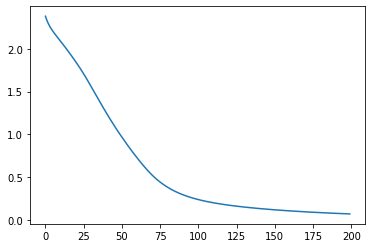

In [39]:
plt.plot(losses)
plt.show()

##5.8 과적합(Overfitting)을 막는 방법들

###5.8.1 데이터의 양을 늘리기

모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어난다. 그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 한다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킨다.

###5.8.2 모델의 복잡도 줄이기

인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정된다. 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것이다. 예를 들어 다음과 같이 클래스를 사용하여 구현한 인공 신경망이 있다고 가정해보자.

In [0]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.relu = nnReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

위 인공 신경망은 3개의 선형 레이어(Linear)를 가지고 있다. 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있다.

In [0]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

위 인공 신경망은 2개의 선형 레이어(Linear)를 가지고 있다. 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 한다.

###5.8.3 가중치 규제(Regularization) 적용하기

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다. 그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말한다. 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularizaiton)가 있다.


*   L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.

*   L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.


L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\lambda \mid w \mid$를 더 한 값을 비용 함수로 하고, L2 규제는 기존의 비용 함수에 모든 가중치에 대해서 $\frac{1}{2} \lambda w^2$를 더 한 값을 비용 함수로 한다. $\lambda$는 규제의 강도를 정하는 하이퍼파라미터다. $\lambda$가 크다면 모델이 훈련 데이터에 대해서 적합한 매개 변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 의미가 된다.

이 두 식 모두 비용 함수를 최소화하기 위해서는 가중치 w들의 값이 작아져야 한다는 특징이 있다. L1 규제로 예를 들어보면 L1 규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도 최소가 되어야 한다. 이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 된다.

예를 들어 $H(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4}$ 라는 수식이 있다고 해보자. 여기에 L1 규제를 사용하였더니, $w_3$의 값이 0이 되었다고 해보자. 이는 $x_3$ 특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미한다.

L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지는 경향을 띈다. L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용하다. 만약, 이런 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장한다. 인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부른다.

파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용한다. weight_decay 매개변수의 기본값은 0입니다. weight_decay 매개변수에 다른 값을 설정할 수도 있다.

```
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
```

*   책에 따라서는 Regularization를 정규화로 번역하기도 하지만, 이는 정규화(Normalization)와 혼동될 수 있으므로 규제 또는 정형화라는 번역이 바람직한 것 같습니다. 정규화에 대한 설명은 링크 : http://blog.naver.com/angryking/221330145300 를 참고.
*   인공 신경망에서 정규화(Normalization)라는 용어가 쓰이는 기법으로는 또 배치 정규화, 층 정규화 등이 있습니다.





###5.8.4 드롭아웃(Dropout)

드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법이다.

![대체 텍스트](https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%832.PNG)

예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용한다.

![대체 텍스트](https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG)

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적이다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지한다.

##5.9 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 된다. 이를 기울기 소실(Gradient Vanishing)이라고 한다.

반대의 경우도 있다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 한다. 이를 기울기 폭주(Gradient Exploding)이라고 하며, 뒤에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 발생할 수 있다.

이번 챕터에서는 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다룬다.

###5.9.1 ReLU와 ReLU의 변형들

앞에서 배운 내용을 간단히 복습해보자. 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워진다. 그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것이다.



*   은닉층에서는 시그모이드 함수를 사용하지 마세요.

*   Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.

*   은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.





###5.9.2 가중치 초기화(Weight initialization)

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 한다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있다.

1) 세이비어 초기화(Xavier Initialization)
논문 : http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했다. 이 초기화 방법은 제안한 사람의 이름을 따서 세이비어(Xavier Initialization) 초기화 또는 글로럿 초기화(Glorot Initialization)라고 한다.

이 방법은 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세운다. 이전 층의 뉴런의 개수를 $n_{in}$, 다음 층의 뉴런의 개수를 $n_{out}$이라고 해보자.

글로럿과 벤지오의 논문에서는 균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용하라고 한다.

$W \sim Uniform(-\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}, +\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }})$

다시 말해 $\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}$를  $m$이라고 하였을 때, -$m$과 +$m$ 사이의 균등 분포를 의미한다.

정규 분포로 초기화할 경우에는 평균이 0이고, 표준 편차 σ가 다음을 만족하도록 한다.

$\sigma=\sqrt{\frac { 2 }{ { n }_{ in }+{ n }_{ out } } }$

세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막는다. 그런데 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않다. ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 He 초기화(He initialization)라고 한다.

2) He 초기화(He initialization)

논문 : https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf

He 초기화(He initialization)는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉜다. 다만, He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않는다. 전과 같이 이전 층의 뉴런의 개수를 $n_{in}$이라고 해보자.

He 초기화는 균등 분포로 초기화 할 경우에는 다음과 같은 균등 분포 범위를 가지도록 한다.

$W\sim Uniform(- \sqrt{\frac { 6 }{ { n }_{ in } } } , \space\space + \sqrt{\frac { 6 }{ { n }_{ in } } } )$

정규 분포로 초기화할 경우에는 표준 편차 σ가 다음을 만족하도록 한다.

$\sigma=\sqrt{\frac { 2 }{ { n }_{ in } } }$



*   시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.

*   ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.

*   ReLU + He 초기화 방법이 좀 더 보편적입니다.

###5.9.3 배치 정규화(Batch Normalization)

ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만든다.

1) 내부 공변량 변화(Internal Covariate Shift)

배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있다. 내부 공변량 변화란 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상을 말한다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생한다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장한다.

*   공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.

*   내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

2) 배치 정규화(Batch Normalization)

배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말한다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행된다. 배치 정규화를 요약하면 다음과 같다. 입력에 대해 평균을 0으로 만들고, 정규화를 한다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행한다. 이 때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 한다.

배치 정규화의 수식은 다음과 같다. 아래에서 $BN$은 배치 정규화를 의미한다.

Input : 미니배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$

Output : $y^{(i)} = BN_{\gamma, \beta}(x^{(i)})$

$\mu_{B}$ ← $\frac{1}{m} \sum_{i=1}^{m} x^{(i)}$ # 미니배치에 대한 표준편차

$\sigma ^{2}_{B}$ ← $\frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu _{B})^{2}$ # 미니 배치에 대한 표준편차

$\hat{x}^{(i)}$ ← $\frac{x^{(i)} - \mu _{B}}{\sqrt{\sigma ^{2}_{B}+\epsilon}}$ # 정규화

$y^{(i)}$ ← $\gamma \hat{x}^{(i)} + \beta = BN_{\gamma, \beta}(x^{(i)})$ # 스케일 조정과 시프트



*   $m$ 은 미니 배치에 있는 샘플의 수
*   $\mu _{B}$는 미니 배치 $B$에 대한 평균
*$\sigma_{B}$는 미니 배치 $B$에 대한 평균
*$\hat{x}^{(i)}$은 평균이 0이고 정규화 된 입력 데이터
*$\epsilon$ 은 분모가 0이 되는 것을 막는 작은 수. 보편적으로 $10^{-5}$
*$\gamma$ 는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
*$\beta$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
* $y^{(i)}$는 스케일과 시프트를 통해 조정한 $BN$의 최종 결과

배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 한다.

*   배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.

*   가중치 초기화에 훨씬 덜 민감해집니다.

*   훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.

*   미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과도 냅니다. 하지만 부수적 효과이므로 드롭 아웃과 함께 사용하는 것이 좋습니다.

*   배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.

*   배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. : https://arxiv.org/pdf/1805.11604.pdf

3) 배치 정규화의 한계

배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재한다.

1. 미니 배치 크기에 의존적이다.

배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 된다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋다. 이처럼 배치 정규화는 배치 크기에 의존적인 면이 있다.

2. RNN에 적용하기 어렵다.

뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가진다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만든다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 한다.

###5.9.4 층 정규화(Layer Normalization)

층 정규화를 이해하기에 앞서 배치 정규화를 시각화 해보겠다. 다음은 $m$이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여준다. 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기하자.

![대체 텍스트](https://wikidocs.net/images/page/61375/%EB%B0%B0%EC%B9%98%EC%A0%95%EA%B7%9C%ED%99%94.PNG)

반면, 층 정규화는 다음과 같다.

![대체 텍스트](https://wikidocs.net/images/page/61375/%EC%B8%B5%EC%A0%95%EA%B7%9C%ED%99%94.PNG)


---

가중치 초기화 참고 자료 :
http://nlp.jbnu.ac.kr/AI2019/slides/ch05-1.pdf

https://reniew.github.io/13/
https://calcifer1009-dev.tistory.com/11



배치 정규화 인터넷 강의(한국어 자막) :
https://www.youtube.com/watch?v=tNIpEZLv_eg

https://www.youtube.com/watch?v=em6dfRxYkYU

https://www.youtube.com/watch?v=nUUqwaxLnWs



배치 정규화 참고자료 :
https://light-tree.tistory.com/139

https://sacko.tistory.com/44?category=632408

http://funmv2013.blogspot.com/2016/09/batch-normalization.html

https://excelsior-cjh.tistory.com/178

https://www.youtube.com/watch?v=HCEr5f-LfVE&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=17

##5.10 활용

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/5_1_%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D_with_My_data%20.ipynb 

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [43]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [44]:
X,y = mnist_train[0]
print('X size = ',X.size())
print('입력 이미지를 [batch_size × 784]의 크기로 reshape = ',X.view(-1, 28*28).size())

X size =  torch.Size([1, 28, 28])
입력 이미지를 [batch_size × 784]의 크기로 reshape =  torch.Size([1, 784])


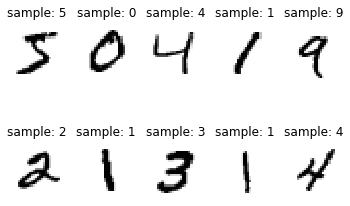

In [45]:
images_and_labels = list(zip(mnist_train.data, mnist_train.targets))
for index, (image, label) in enumerate(images_and_labels[:10]): # 10개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [46]:
for i in range(10):
  print(i,'번 인덱스 샘플의 레이블 : ',mnist_train.targets[i])

0 번 인덱스 샘플의 레이블 :  tensor(5)
1 번 인덱스 샘플의 레이블 :  tensor(0)
2 번 인덱스 샘플의 레이블 :  tensor(4)
3 번 인덱스 샘플의 레이블 :  tensor(1)
4 번 인덱스 샘플의 레이블 :  tensor(9)
5 번 인덱스 샘플의 레이블 :  tensor(2)
6 번 인덱스 샘플의 레이블 :  tensor(1)
7 번 인덱스 샘플의 레이블 :  tensor(3)
8 번 인덱스 샘플의 레이블 :  tensor(1)
9 번 인덱스 샘플의 레이블 :  tensor(4)


In [0]:
# dataset loader
batch_size = 100
train_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)
val_loader = DataLoader(dataset=mnist_test,
                         batch_size=len(mnist_test))

In [0]:
class Model1(nn.Module):    
    def __init__(self):
        super(Model1,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), # input_layer = 784, hidden_layer1 = 512
            nn.ReLU(),
            nn.Linear(512, 256), # hidden_layer2 = 512, hidden_layer3 = 256
            nn.ReLU(),
            nn.Linear(256, 128), # hidden_layer3 = 256, output_layer = 128
            nn.ReLU(),
            nn.Linear(128, 64), # hidden_layer4 = 128, output_layer = 64
            nn.ReLU(),
            nn.Linear(64, 32), # hidden_layer5 = 64, output_layer = 32
            nn.ReLU(),
            nn.Linear(32, 10) # output_layer6 = 32, output_layer = 10
            )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [0]:
model_1 = Model1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(),lr=0.05)

In [51]:
plot_list = {'train':[],'val':[],'accuracy':[]}

epochs = 10
for epoch in range(epochs):
    model_1.train()
    train_losses = []
    for i,data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_1(inputs)
        train_loss = criterion(outputs,targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())

    model_1.eval()
    val_losses = []
    for i,data in enumerate(val_loader):
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_1(inputs)
        val_loss = criterion(outputs,targets)
        val_losses.append(val_loss.detach())

        prob,label = torch.exp(outputs).topk(1,dim=1)
    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 2.282534284989039
1 epoch val loss = 2.12750244140625
1 epoch accuracy = 0.2158999890089035
--------------------------------------------------
2 epoch train loss = 1.0891710687677065
2 epoch val loss = 0.4014632999897003
2 epoch accuracy = 0.8848999738693237
--------------------------------------------------
3 epoch train loss = 0.30712063572059073
3 epoch val loss = 0.2040095180273056
3 epoch accuracy = 0.9447999596595764
--------------------------------------------------
4 epoch train loss = 0.18174543087060252
4 epoch val loss = 0.1805928647518158
4 epoch accuracy = 0.9455999732017517
--------------------------------------------------
5 epoch train loss = 0.1367997358304759
5 epoch val loss = 0.13496047258377075
5 epoch accuracy = 0.961899995803833
--------------------------------------------------
6 epoch train loss = 0.09684936542995275
6 epoch val loss = 0.11621007323265076
6 epoch accuracy = 0.9697999954223633
------------------------------------------------

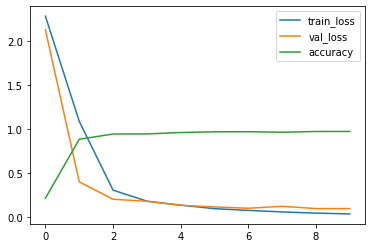

In [52]:
plt.plot(plot_list['train'],label = 'train_loss')
plt.plot(plot_list['val'],label = 'val_loss')
plt.plot(plot_list['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

In [0]:
import numpy as np
import itertools

In [0]:
def plot_confusion_matrix(cm,
                          target_names=None,
                          cmap=None,
                          normalize=True,
                          labels=True,
                          title='Confusion matrix'):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

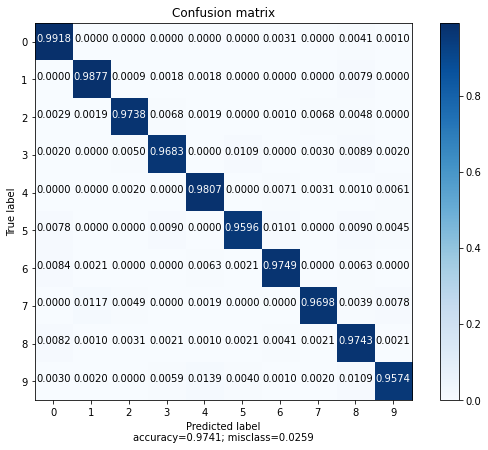

In [55]:
from sklearn.metrics import confusion_matrix
metrics = confusion_matrix(targets.cpu(),label.cpu())
plot_confusion_matrix(metrics,target_names=[0,1,2,3,4,5,6,7,8,9])

In [0]:
class Model2(nn.Module):    
    def __init__(self):
        super(Model2,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512), # input_layer = 784, hidden_layer1 = 512
            nn.ELU(),
            nn.Linear(512, 256), # hidden_layer2 = 512, hidden_layer3 = 256
            nn.ELU(),
            nn.Linear(256, 128), # hidden_layer3 = 256, output_layer = 128
            nn.ELU(),
            nn.Linear(128, 64), # hidden_layer4 = 128, output_layer = 64
            nn.ELU(),
            nn.Linear(64, 32), # hidden_layer5 = 64, output_layer = 32
            nn.ELU(),
            nn.Linear(32, 10) # output_layer6 = 32, output_layer = 10
            )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [57]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [0]:
model_2 = Model2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(),lr=0.05)

In [59]:
plot_list = {'train':[],'val':[],'accuracy':[]}

epochs = 10
for epoch in range(epochs):
    model_2.train()
    train_losses = []
    for i,data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_2(inputs)
        train_loss = criterion(outputs,targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())

    model_2.eval()
    val_losses = []
    for i,data in enumerate(val_loader):
        inputs,targets = data[0].to(device), data[1].to(device)

        outputs = model_2(inputs)
        val_loss = criterion(outputs,targets)
        val_losses.append(val_loss.detach())

        prob,label = torch.exp(outputs).topk(1,dim=1)
    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()

    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print(f"{epoch+1} epoch accuracy = {val_accuracy}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))
    plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.2920595042407512
1 epoch val loss = 0.5000841021537781
1 epoch accuracy = 0.8446999788284302
--------------------------------------------------
2 epoch train loss = 0.42769419754544896
2 epoch val loss = 0.3488239645957947
2 epoch accuracy = 0.8941999673843384
--------------------------------------------------
3 epoch train loss = 0.3265053380156557
3 epoch val loss = 0.2738618552684784
3 epoch accuracy = 0.9157999753952026
--------------------------------------------------
4 epoch train loss = 0.2661183009420832
4 epoch val loss = 0.24618951976299286
4 epoch accuracy = 0.9243999719619751
--------------------------------------------------
5 epoch train loss = 0.22695830874765913
5 epoch val loss = 0.20775224268436432
5 epoch accuracy = 0.9375999569892883
--------------------------------------------------
6 epoch train loss = 0.19445295980200172
6 epoch val loss = 0.18469907343387604
6 epoch accuracy = 0.9440000057220459
-------------------------------------------

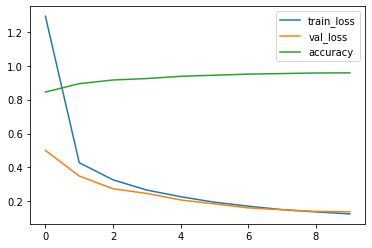

In [60]:
plt.plot(plot_list['train'],label = 'train_loss')
plt.plot(plot_list['val'],label = 'val_loss')
plt.plot(plot_list['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

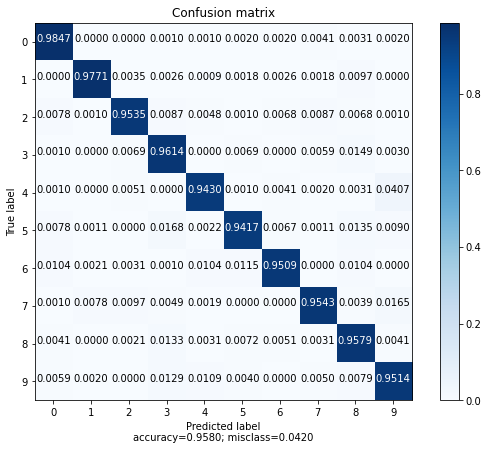

In [61]:
metrics = confusion_matrix(targets.cpu(),label.cpu())
plot_confusion_matrix(metrics,target_names=[0,1,2,3,4,5,6,7,8,9])

##5.11 Non Linear 예시

In [0]:
import numpy as np
import matplotlib.pyplot as plt

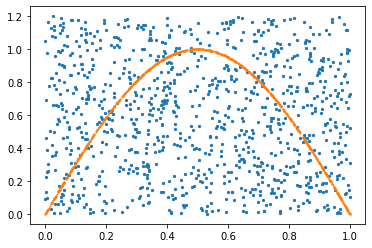

In [79]:
X = np.random.random((1000,2))
X[:,1] = X[:,1]*1.2

plt.scatter(X[:,0],X[:,1],s=5)
plt.scatter(X[:,0],np.sin(X[:,0]*np.pi),s=1)
plt.show()

In [0]:
y = []
for i in X:
    if i[1]<np.sin(i[0]*np.pi):y.append([1.])
    else:y.append([0.])
y = np.array(y)

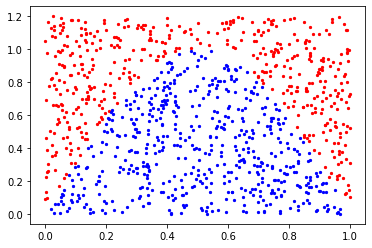

In [81]:
for i,x in enumerate(X):
    if y[i]==0:
        plt.scatter(*x,c='red',s=5)
    else:
        plt.scatter(*x,c='blue',s=5)

In [0]:
# 단층 퍼셉트론
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.layer = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer(x)
        out = self.sigmoid(out)
        return out

In [0]:
model1 = Model1()
criterion= nn.BCELoss()
optimizer = optim.Adam(model1.parameters(),lr=0.01)

In [85]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model1(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.689344
Epoch 1000 Cost: 0.458604
Epoch 2000 Cost: 0.457463
Epoch 3000 Cost: 0.457463
Epoch 4000 Cost: 0.457463
Epoch 5000 Cost: 0.457463
Epoch 6000 Cost: 0.457462
Epoch 7000 Cost: 0.457463
Epoch 8000 Cost: 0.457462
Epoch 9000 Cost: 0.457463


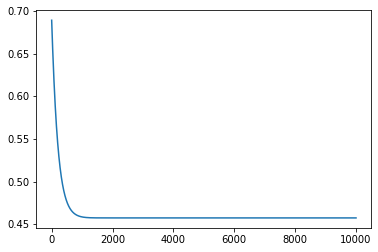

In [86]:
plt.plot(losses)
plt.show()

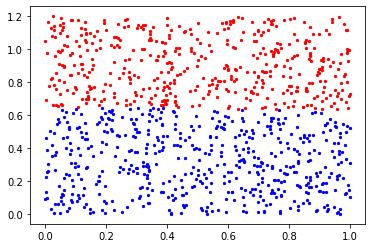

In [87]:
for i,x in enumerate(X):
    pred_y = model1(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)

In [0]:
# 다층 퍼셉트론
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.sigmoid(out)
        return out

In [0]:
model2 = Model2()
criterion= nn.BCELoss()
optimizer = optim.Adam(model2.parameters(),lr=0.001)

In [90]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model2(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.746444
Epoch 1000 Cost: 0.470861
Epoch 2000 Cost: 0.391029
Epoch 3000 Cost: 0.296724
Epoch 4000 Cost: 0.225787
Epoch 5000 Cost: 0.152353
Epoch 6000 Cost: 0.116077
Epoch 7000 Cost: 0.093285
Epoch 8000 Cost: 0.077320
Epoch 9000 Cost: 0.065021


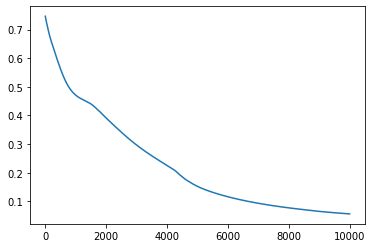

In [91]:
plt.plot(losses)
plt.show()

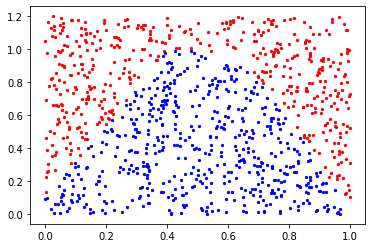

In [92]:
for i,x in enumerate(X):
    pred_y = model2(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)